# RSJ model: CPR of $I(\phi)=[\sin(\phi)+\eta\sin(2\phi)]+A(\sin(\phi+C)+\eta\sin[2(\phi+C)])$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm
from scipy.integrate import odeint
from scipy.optimize import fmin
from scipy.io import savemat

In [2]:
import matplotlib as mpl
plt.rcParams.update({
    "text.usetex": True,
    "text.latex.preamble": r'\usepackage[utf8]{inputenc}',
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

In [3]:
%matplotlib inline

In [4]:
%load_ext Cython

In [5]:
h=6.626e-34
hbar=h/2/np.pi
Qe=1.608e-19

In [6]:
%%cython
cimport numpy as np
from libc.math cimport sin, cos, atanh,pi
import numpy as np

h=6.626e-34
hbar=h/2/pi
Qe=1.608e-19
Ic=2e-6
Rn=13
cpdef double CPR(double G, double A, double eta, double C):
    '''
        Current-phase relationship for the junction
    '''
    return sin(G)+eta*sin(2*G)+A*sin(G+C)+A*eta*sin(2*G+2*C)
    
cpdef double dGdt(G,double t,double I,double A, double eta,double C):
    '''
        Define y = [gamma]
        dy_dt =  - f(gamma) + i(t)) 
    '''
    der = 2*Qe*Rn*(I-Ic*CPR(G,A,eta,C))/hbar
    return der 


### Merge mat

In [7]:
import sys
#sys.path.insert(0, 'C:/Users/QMDla/Documents/GitHub/data_file_manipulations/')
sys.path.insert(0, '/Volumes/GoogleDrive/My Drive/GitHub/data_file_manipulations/')

In [8]:
import files_manipulation

In [9]:
import importlib

In [10]:
importlib.reload(files_manipulation)

<module 'files_manipulation' from '/Volumes/GoogleDrive/My Drive/GitHub/data_file_manipulations/files_manipulation.py'>

In [12]:
dataDir = "./"
files_manipulation.merge_multiple_mat(dataDir,True) # True for saving .h5


IDC.shape=(800,)
C.shape=(41,)
V.shape=(41, 800, 16)
DVDI.shape=(41, 800, 16)
eta.shape=(16,)
A.shape=(16,)
noise_std.shape=(16,)


### Plot CPR

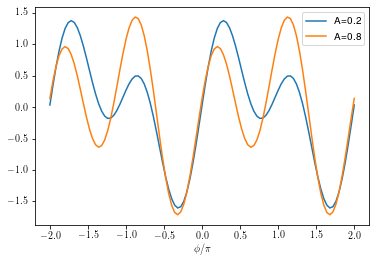

In [80]:
eta=0.8
A=np.array([0.2,0.8])
def CPR2(G, A, eta, C):
    return np.sin(G)+eta*np.sin(2*G)+A*np.sin(G+C)+A*eta*np.sin(2*G+2*C)
phi=np.linspace(-2,2,101)*np.pi

beta=np.pi*(-0.8)#np.linspace(-0.8,0.8,3)

Is=np.empty([len(phi),len(A)])
plt.figure()
for j in range(0,len(A)):
    for i in range(0,len(phi)):
        Is[i,j]=CPR2(phi[i],A[j],eta,beta)
    plt.plot(phi/np.pi,Is[:,j],label="A="+str(np.round(A[j],3)))
plt.xlabel('$\phi/\pi$')
plt.legend(loc=1)


### Plot map and save data

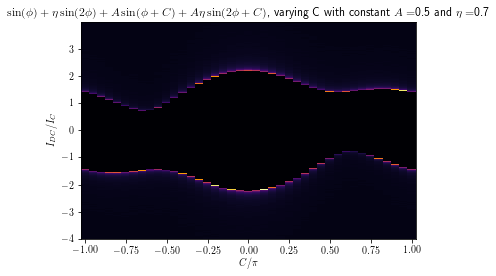

In [70]:
#plt.figure()
#plt.pcolor(C/np.pi,IDC_array/Ic,np.transpose(DVDI),cmap='inferno',shading='auto')
#plt.xlabel("$C/\pi$")
#plt.ylabel("$I_{DC}/I_C$")
#plt.title("$\sin(\phi)+\eta\sin(2\phi)+A\sin(\phi+C)+A\eta\sin(2\phi+C)$, varying C with constant $A=$"+str(A)+" and $\eta=$"+str(eta))
#plt.savefig("./eta0p7_A0p5/two_channels_A0p5_eta_0p7_step_0p005_41ptC.pdf")

#savemat("./eta0p7_A0p5/simulation_dVdI_vs_C_constant_A_0p5_eta_0p7_two_channels_step_0p005.mat",mdict={'IDC':IDC_array,'C':C,'V':V,'DVDI':DVDI})


## Load Data and Plot

In [14]:
import h5py

In [15]:
#for file in os.listdir( h5Dir ):
fd= h5py.File('merged.h5','r')

In [16]:
list(fd.keys())

['A', 'C', 'DVDI', 'IDC', 'V', 'eta', 'noise_std']

In [17]:
A=fd['A'][...]
print(A.shape)
C=fd['C'][...]
print(C.shape)
DVDI=fd['DVDI'][...]
print(DVDI.shape)
IDC=fd['IDC'][...]
print(IDC.shape)
V=fd['V'][...]
print(V.shape)
eta=fd['eta'][...]
print(eta.shape)
noise_std=fd['noise_std'][...]
print(noise_std[0])

(16,)
(41,)
(41, 800, 16)
(800,)
(41, 800, 16)
(16,)
0.004


In [18]:
print(A)
print(eta)

[0.2 0.2 0.2 0.2 0.4 0.4 0.4 0.4 0.6 0.6 0.6 0.6 0.8 0.8 0.8 0.8]
[0.2 0.4 0.6 0.8 0.2 0.4 0.6 0.8 0.2 0.4 0.6 0.8 0.2 0.4 0.6 0.8]


### Plot all the $R(I_{DC}, C)$ maps

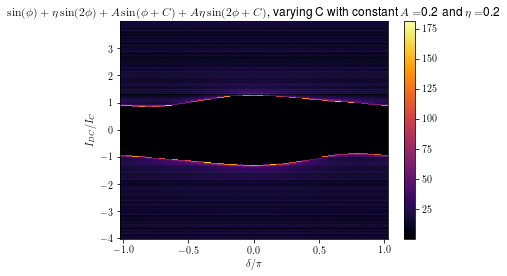

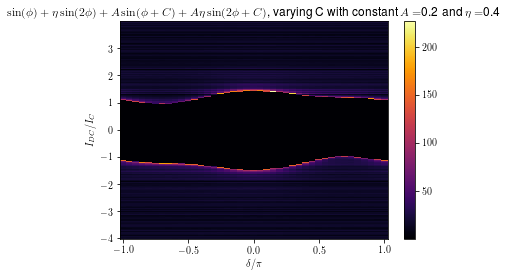

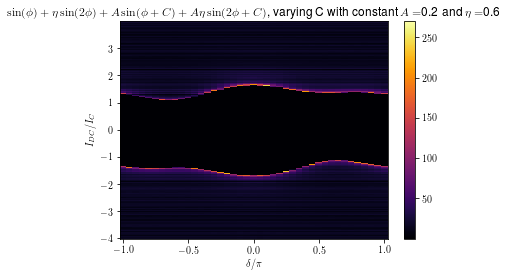

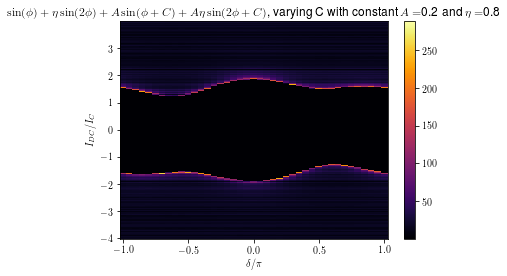

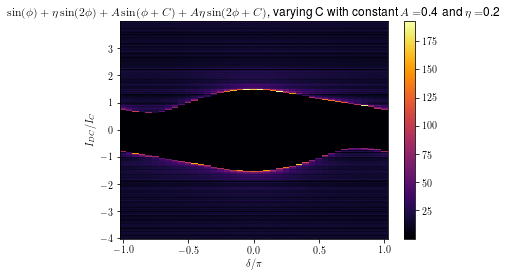

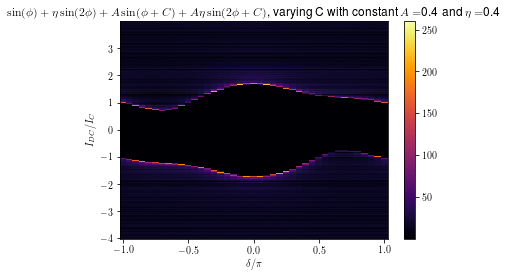

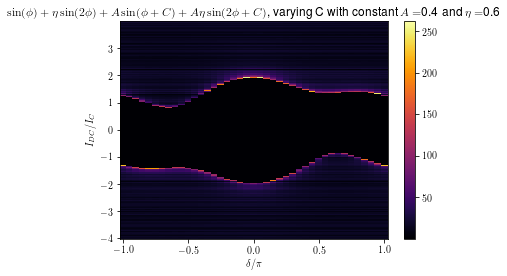

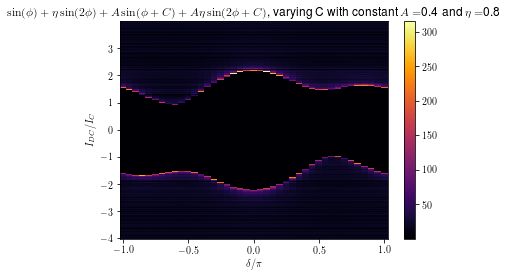

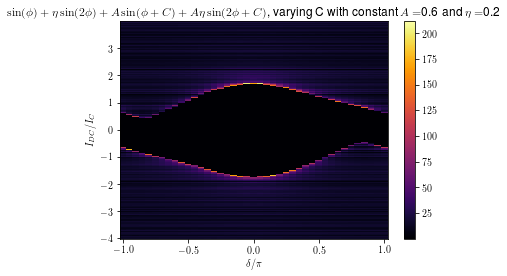

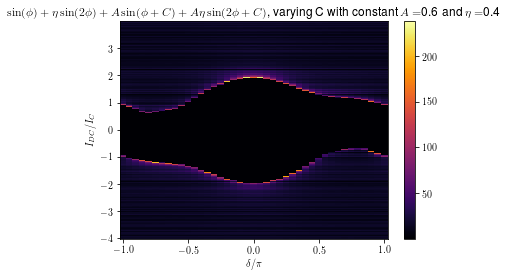

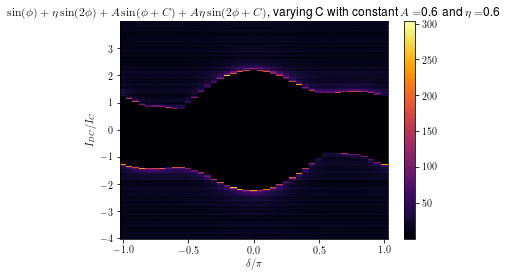

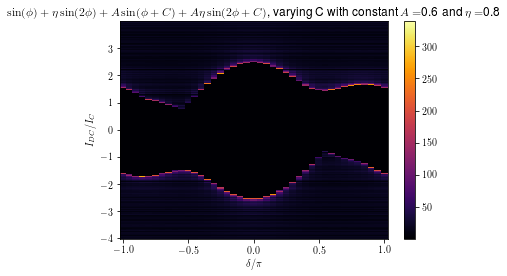

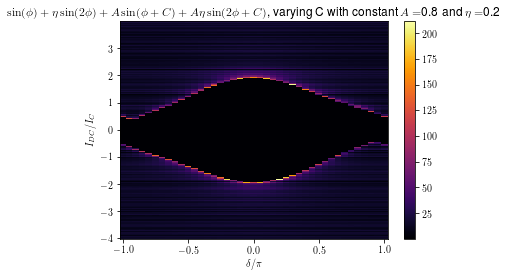

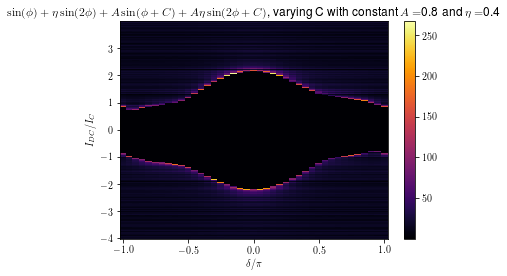

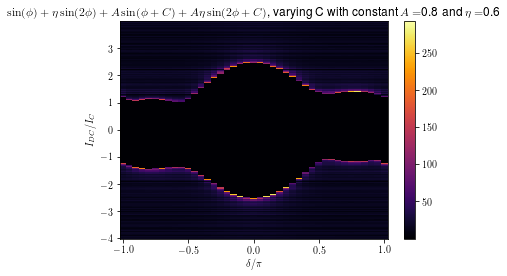

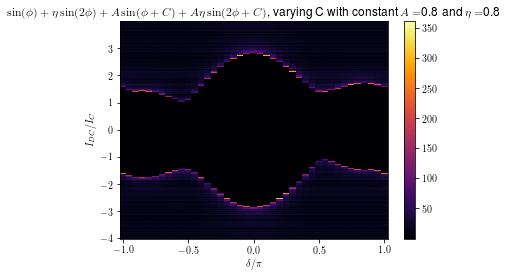

In [19]:
plt.figure()
for i in range(0,len(eta)):
    plt.pcolor(C/np.pi,IDC/Ic,np.squeeze(np.transpose(DVDI[:,:,i])),cmap='inferno',linewidth=0,rasterized=True,shading='auto')
    plt.xlabel("$\delta/\pi$")
    plt.ylabel("$I_{DC}/I_C$")
    plt.colorbar()

    plt.title("$\sin(\phi)+\eta\sin(2\phi)+A\sin(\phi+C)+A\eta\sin(2\phi+C)$, varying C with constant $A=$"+str(A[i])+" and $\eta=$"+str(eta[i]))
    plt.show()
#plt.savefig("./eta0p7_A0p5/two_channels_A0p5_eta_0p7_step_0p005_41ptC.pdf")


## Find $I_{C+}$, $I_{C-}$, asymmetry, and peak heights

In [20]:
import sys
sys.path.insert(0, '/Volumes/GoogleDrive/My Drive/GitHub/Josephson-junction-simulations/')

import extract_Ic_and_peak

In [21]:
import importlib

In [75]:
importlib.reload(extract_Ic_and_peak)

<module 'extract_Ic_and_peak' from '/Volumes/GoogleDrive/My Drive/GitHub/Josephson-junction-simulations/extract_Ic_and_peak.py'>

### Find $I_{C+}$ and $I_{C-}$ 

In [67]:
Icn=np.empty([len(C),len(eta)])
Icp=np.empty([len(C),len(eta)])
asymmetry=np.empty([len(C),len(eta)])

for j in range(0,len(eta)):
    for i in range(0,len(C)):
        #Icn[i,j],Icp[i,j],peak_n[i,j],peak_p[i,j]=
        distance_guess=len(np.squeeze(DVDI[i,:,j]))//50
        height_guess=float(DVDI[i,0,j])*2
        Icn[i,j],Icp[i,j]=extract_Ic_and_peak.extract_Ic(IDC,np.squeeze(DVDI[i,:,j]),distance_guess,height_guess)
        if(Icn[i,j]==0):
            print(C[i]/np.pi,eta[j],Icn[i,j],Icp[i,j])
            plt.figure()
            plt.plot(IDC,DVDI[i,:,j])
            plt.show()
            asymmetry[i,j]=1
        else:
            asymmetry[i,j]=Icp[i,j]/Icn[i,j]

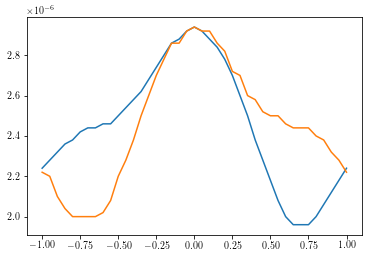

In [68]:
plt.figure()
plt.plot(C/np.pi,Icn[:,1])
plt.plot(C/np.pi,Icp[:,1])

### Find peak heights

In [76]:
peak_n=np.empty([len(C),len(eta)])
peak_p=np.empty([len(C),len(eta)])
for j in range(0,len(eta)):
    for i in range(0,len(C)):
        #Icn[i,j],Icp[i,j],peak_n[i,j],peak_p[i,j]=
        distance_guess=len(np.squeeze(DVDI[i,:,j]))//20
        height_guess=float(DVDI[i,0,j])*3
        peak_n[i,j],peak_p[i,j]=extract_Ic_and_peak.extract_height(IDC,np.squeeze(DVDI[i,:,j]),distance_guess,height_guess)
        if(peak_n[i,j]==0):
            print(C[i]/np.pi,eta[j],peak_n[i,j],peak_p[i,j])
            plt.figure()
            plt.plot(DVDI[i,:,j])
            plt.show()

### Plot peak heights vs C, grouped by the same A

In [56]:
colors = plt.cm.gnuplot(np.linspace(0,1,5))

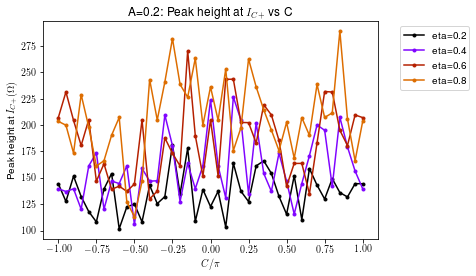

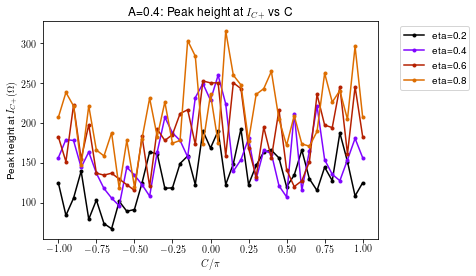

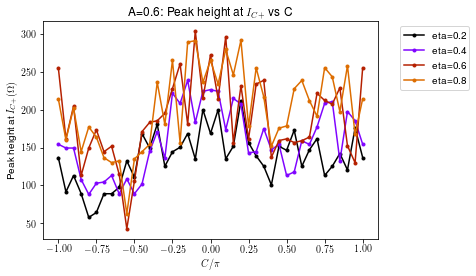

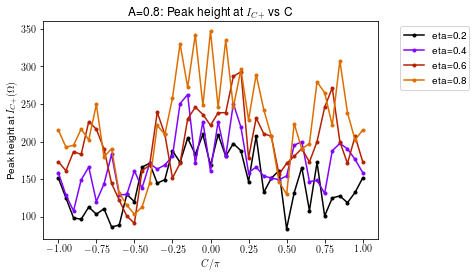

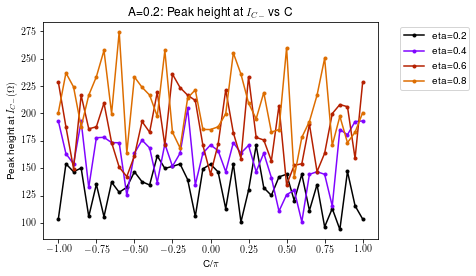

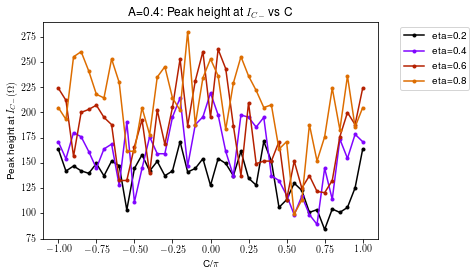

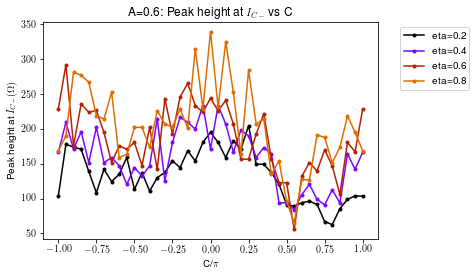

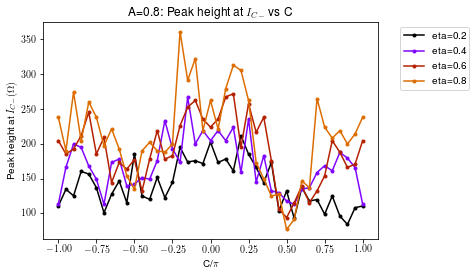

In [77]:
for j in range(0,4):
    plt.figure()
    cindx=0
    for i in range(0+j*4,(j+1)*4): 
        plt.plot(C/np.pi,peak_p[:,i],'.-',label='eta='+str(eta[i]),color=colors[cindx])
        cindx=cindx+1

    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.title('A='+str(A[0+j*4])+': Peak height at $I_{C+}$ vs C')
    plt.xlabel('$C/\pi$')
    plt.ylabel('Peak height at $I_{C+}(\Omega)$')
    plt.show()

for j in range(0,4):
    plt.figure()
    cindx=0
    for i in range(0+j*4,(j+1)*4): 
        plt.plot(C/np.pi,peak_n[:,i],'.-',label='eta='+str(eta[i]),color=colors[cindx])
        cindx=cindx+1

    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.title('A='+str(A[0+j*4])+': Peak height at $I_{C-}$ vs C')
    plt.xlabel('C/$\pi$')
    plt.ylabel('Peak height at $I_{C-}(\Omega)$')
    plt.show()

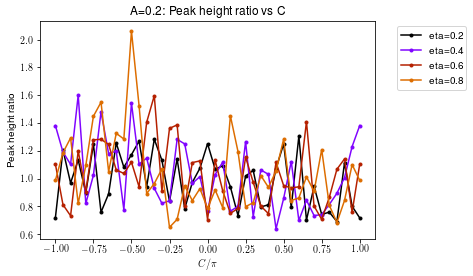

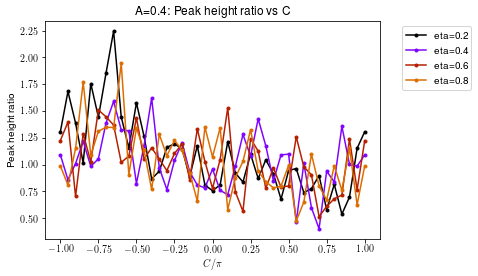

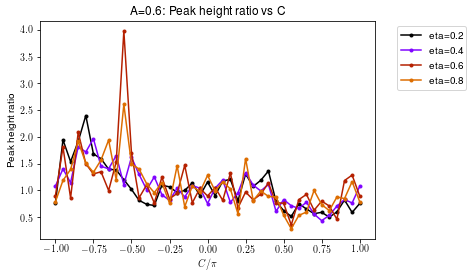

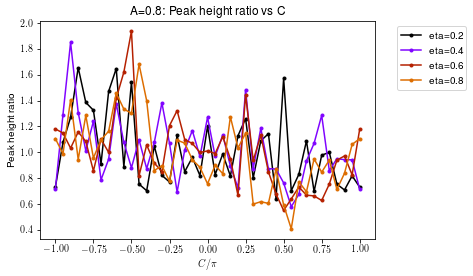

In [78]:
for j in range(0,4):
    plt.figure()
    cindx=0
    for i in range(0+j*4,(j+1)*4): 
        plt.plot(C/np.pi,peak_n[:,i]/peak_p[:,i],'.-',label='eta='+str(eta[i]),color=colors[cindx])
        cindx=cindx+1

    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.title('A='+str(A[0+j*4])+': Peak height ratio vs C')
    plt.xlabel('$C/\pi$')
    plt.ylabel('Peak height ratio')
    plt.show()

### Load experimental data

In [45]:
exp_data=loadmat("dense_sweeps_27mK_0mT.mat")

In [46]:
list(exp_data.keys())

['__header__',
 '__version__',
 '__globals__',
 'dense27mK0mTnp',
 'dense27mK0mTpn']

In [47]:
Sweep_np=exp_data['dense27mK0mTnp'][...]
print(Sweep_np.shape)
Sweep_pn=exp_data['dense27mK0mTpn'][...]
print(Sweep_pn.shape)

(2001, 2)
(2001, 2)


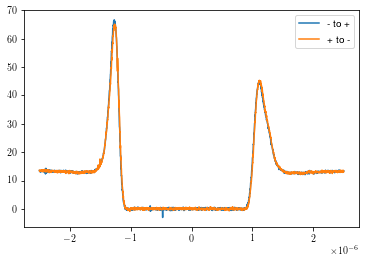

In [48]:
plt.figure()
plt.plot(Sweep_np[:,0],Sweep_np[:,1],label="- to +")
plt.plot(Sweep_pn[:,0],Sweep_pn[:,1],label="+ to -")
plt.legend()
plt.show()

In [49]:
from scipy.signal import find_peaks

In [53]:
Index,Height =find_peaks(Sweep_np[:,1],distance=600,height=2)
print(Index)
print(Height)
Index,Height =find_peaks(Sweep_pn[:,1],distance=600,height=2)
print(Index)
print(Height)

[ 492 1449]
{'peak_heights': array([66.6718804, 44.9880164])}
[ 554 1506]
{'peak_heights': array([45.327406, 65.164264])}


In [40]:
peak_n_exp=66
peak_p_exp=45
peak_ratio_exp=peak_n_exp/peak_p_exp
print(peak_ratio_exp)

1.4666666666666666


### Plot peak heights vs C, grouped by the same eta

In [54]:
size_A=4

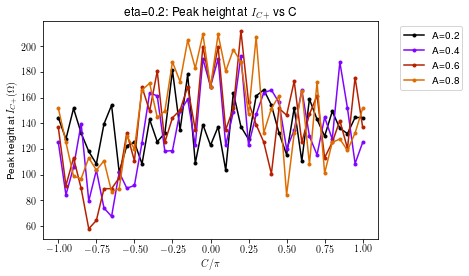

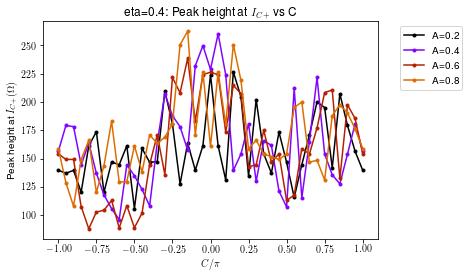

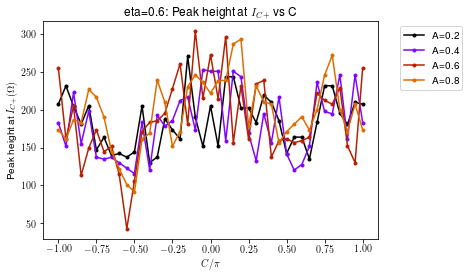

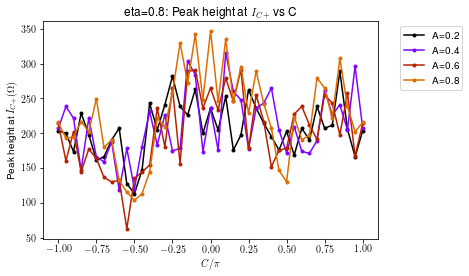

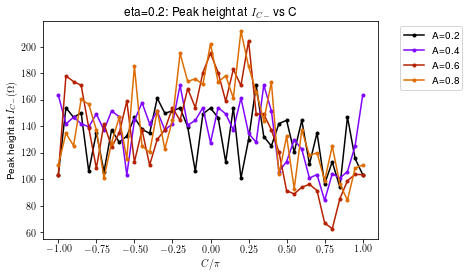

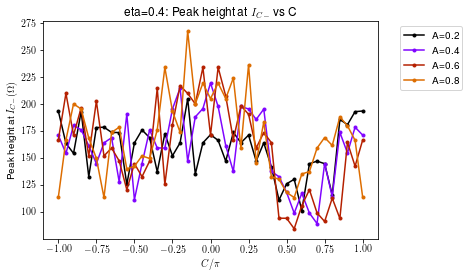

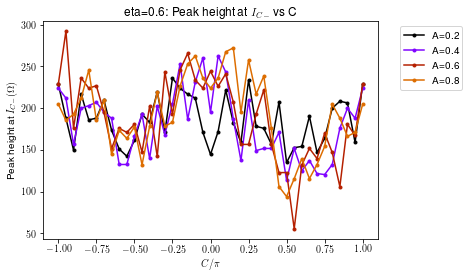

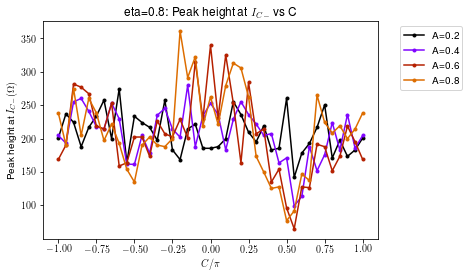

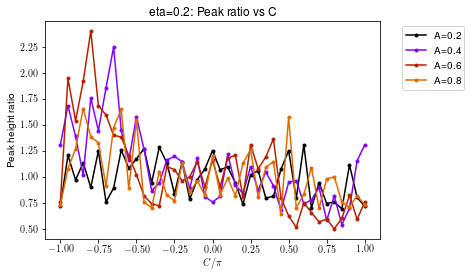

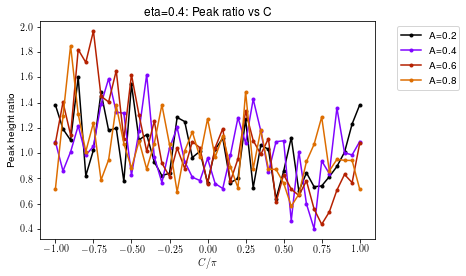

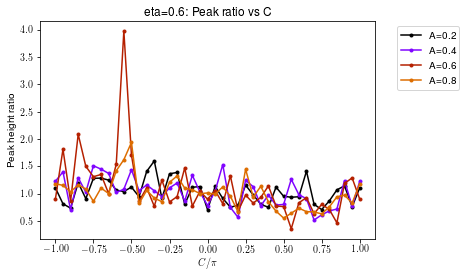

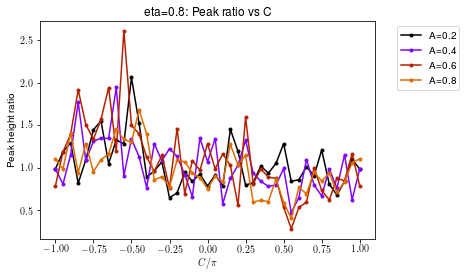

In [79]:
for j in range(0,size_A):
    plt.figure()
    cindx=0
    for i in range(j,len(eta),size_A):
        plt.plot(C/np.pi,peak_p[:,i],'.-',label='A='+str(A[i]),color=colors[cindx])
        cindx=cindx+1

    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.title('eta='+str(eta[j])+': Peak height at $I_{C+}$ vs C')
    plt.xlabel('$C/\pi$')
    plt.ylabel('Peak height at $I_{C+}(\Omega)$')
    plt.show()

for j in range(0,size_A):
    plt.figure()
    cindx=0
    for i in range(j,len(eta),size_A):
        plt.plot(C/np.pi,peak_n[:,i],'.-',label='A='+str(A[i]),color=colors[cindx])
        cindx=cindx+1

    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.title('eta='+str(eta[j])+': Peak height at $I_{C-}$ vs C')
    plt.xlabel('$C/\pi$')
    plt.ylabel('Peak height at $I_{C-}(\Omega)$')
    plt.show()

for j in range(0,size_A):
    plt.figure()
    cindx=0
    for i in range(j,len(eta),size_A):
        plt.plot(C/np.pi,peak_n[:,i]/peak_p[:,i],'.-',label='A='+str(A[i]),color=colors[cindx])
        cindx=cindx+1

    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.title('eta='+str(eta[j])+': Peak ratio vs C')
    plt.xlabel('$C/\pi$')
    plt.ylabel('Peak height ratio')
    plt.show()

### Asymmetry

In [52]:
asymm_exp=np.ones(len(C))*0.83

### Asymmetry vs C, grouped by the same A

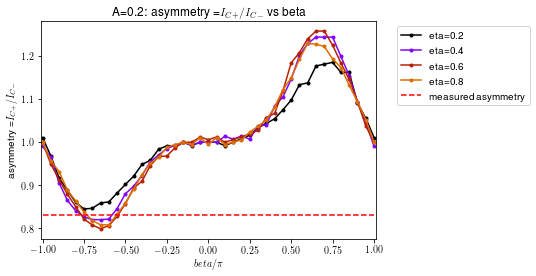

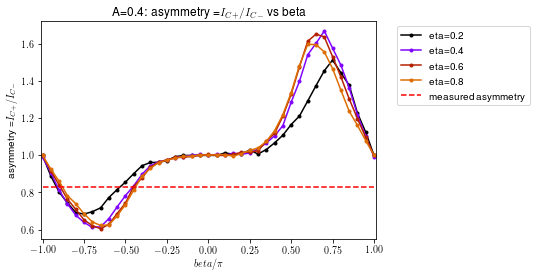

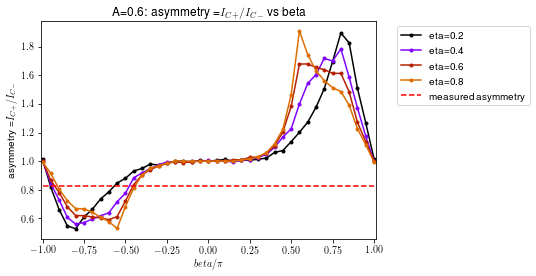

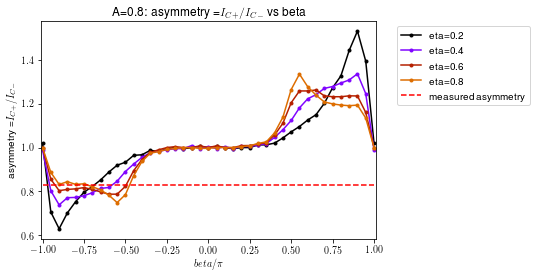

In [69]:
for j in range(0,size_A):
    plt.figure()
    cindx=0
    for i in range(0+j*size_A,(j+1)*size_A): 
        plt.plot(C/np.pi,asymmetry[:,i],'.-',label='eta='+str(eta[i]),color=colors[cindx])
        cindx=cindx+1
    plt.plot(C/np.pi,asymm_exp,'r--',label="measured asymmetry")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.title("A="+str(A[0+j*size_A])+": asymmetry =$I_{C+}/I_{C-}$ vs beta")
    plt.xlim([-1.01,1.01])
    plt.xlabel("$beta/\pi$")
    plt.ylabel('asymmetry =$I_{C+}/I_{C-}$')
    plt.show()

### Asymmetry vs C, grouped by the same eta

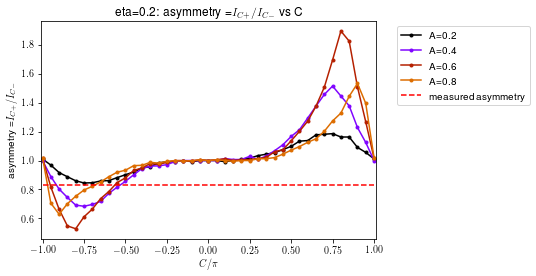

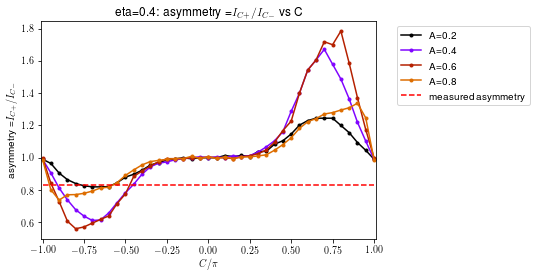

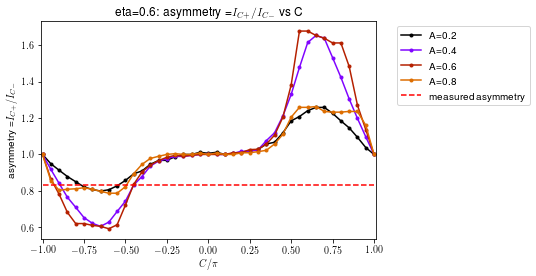

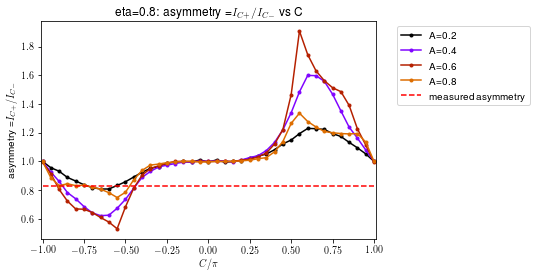

In [70]:
for j in range(0,size_A):
    plt.figure()
    cindx=0
    for i in range(j,len(eta),size_A):
        plt.plot(C/np.pi,asymmetry[:,i],'.-',label='A='+str(A[i]),color=colors[cindx])
        cindx=cindx+1
    plt.plot(C/np.pi,asymm_exp,'r--',label="measured asymmetry")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.title('eta='+str(eta[j])+': asymmetry =$I_{C+}/I_{C-}$ vs C')
    plt.xlim([-1.01,1.01])
    plt.xlabel('$C/\pi$')
    plt.ylabel('asymmetry =$I_{C+}/I_{C-}$')
    plt.show()

### $I_{C+}$ vs C, grouped by the same A

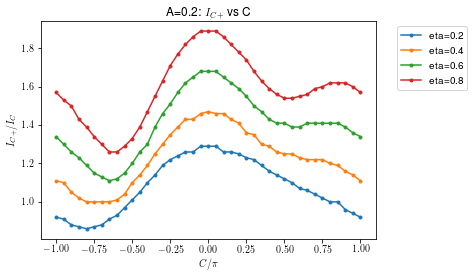

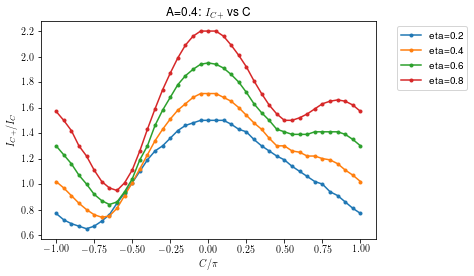

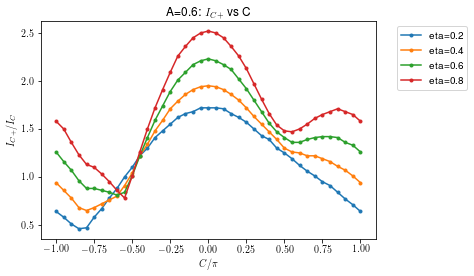

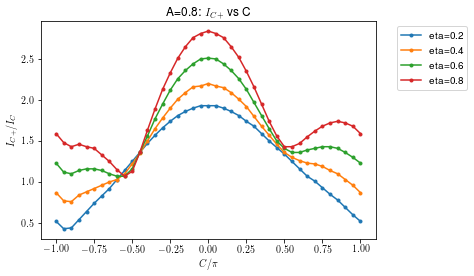

In [71]:
for j in range(0,size_A):
    plt.figure()
    for i in range(0+j*size_A,(j+1)*size_A): 
        plt.plot(C/np.pi,Icp[:,i]/Ic,'.-',label='eta='+str(eta[i]))
    plt.title('A='+str(A[0+j*size_A])+': $I_{C+}$ vs C')
    plt.xlabel('$C/\pi$')
    plt.ylabel('$I_{C+}/I_C$')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

### $I_{C-}$ vs C, grouped by the same A


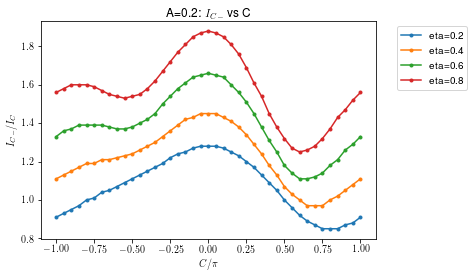

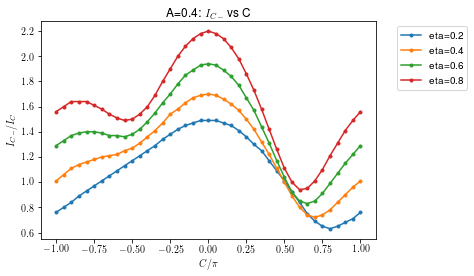

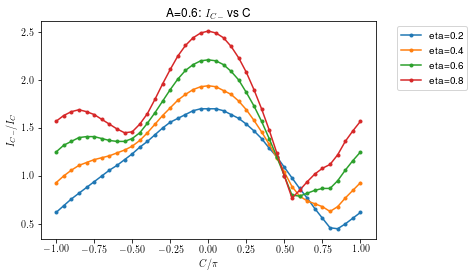

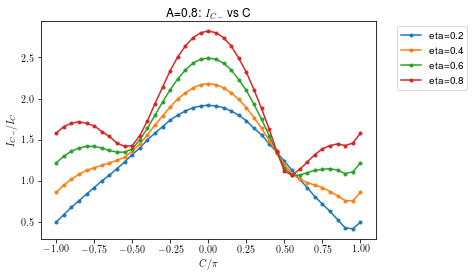

In [49]:
for j in range(0,size_A):
    plt.figure()
    for i in range(0+j*size_A,(j+1)*size_A): 
        plt.plot(C/np.pi,Icn[:,i]/Ic,'.-',label='eta='+str(eta[i]))
    plt.title('A='+str(A[0+j*size_A])+': $I_{C-}$ vs C')
    plt.xlabel('$C/\pi$')
    plt.ylabel('$I_{C-}/I_C$')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

# Save it into a .csv file

In [74]:
np.savetxt("./eta0p7_A0p5/csv/IDC.csv", IDC, delimiter=",")
np.savetxt("./eta0p7_A0p5/csv/C.csv", C, delimiter=",")
np.savetxt("./eta0p7_A0p5/csv/V.csv", V, delimiter=",")
np.savetxt("./eta0p7_A0p5/csv/DVDI.csv", DVDI, delimiter=",")
